점수 :

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
# A.
data = df.mathematics.describe()
iqr = data['75%'] - data['25%']
r = data['max'] - data['min']
v = data['std']**2
f = df.mathematics.mode()
print(data,'\n','범위:',r,'\n','최빈값:',f.values,'\n', '분산:', v,'\n','IQR:', iqr)

count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64 
 범위: 37.0 
 최빈값: [77 82 84] 
 분산: 70.80163265306119 
 IQR: 8.0


In [3]:
type(data)

pandas.core.series.Series

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [5]:
score = df.english
type(score)

pandas.core.series.Series

In [12]:
# A.
z = (score - np.mean(score)) / np.std(score)
print(type(z)) # 시리즈
print(z.values[:5],type(z.values[:5])) # 배열
# z.values[:5].tolist() # 리스트

<class 'pandas.core.series.Series'>
[-1.68843012  1.09469645 -0.24532745 -1.79150888 -0.14224869] <class 'numpy.ndarray'>


Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

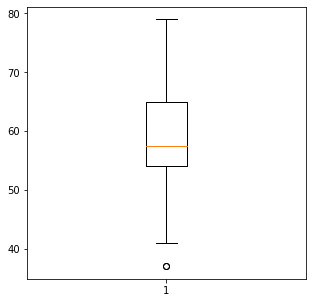

In [13]:
# A : 이상치 탐지를 위한 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.boxplot(score)
plt.show()

In [14]:
# A.이상치 및 인덱스 출력
s = score.describe()
print(s,'\n')
iqr = s['75%'] - s['25%']
print('IQR:',iqr,'\n')
lwhisker_chk = s['25%'] - 1.5 * iqr
print('lwhisker_chk:', lwhisker_chk,'\n')
lwhisker = score[score > lwhisker_chk].min()
print('lwhisker:',lwhisker,'\n')
print('이상치:',score[score < lwhisker].values[0],'\n')
# 이상치 인덱스 확인
idx = score[score < lwhisker].index
print('이상치 인덱스:', idx)

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64 

IQR: 11.0 

lwhisker_chk: 37.5 

lwhisker: 41 

이상치: 37 

이상치 인덱스: Int64Index([20, 35], dtype='int64', name='student number')


In [17]:
score[score < lwhisker]

student number
20    37
35    37
Name: english, dtype: int64

In [50]:
# A. 이상치 제거
rscore = score.drop(idx)

rscore.describe()

count    48.000000
mean     59.270833
std       8.936513
min      41.000000
25%      54.000000
50%      59.500000
75%      65.250000
max      79.000000
Name: english, dtype: float64

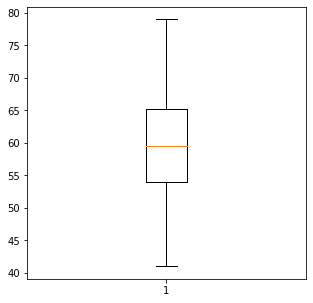

In [51]:
# A. 이상치 제거 확인
plt.figure(figsize=(5,5))
plt.boxplot(rscore)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(산점도, 회귀직선 포함, 박스플롯, 바이올린플롯을 2행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)
- 두개 변수에 대한 다차원 그래프(조인트 플롯)를 시각화

In [18]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [20]:
# A.
en_scores = scores_df.english
ma_scores = scores_df.mathematics
np.cov(en_scores,ma_scores)[0,1].round(2)

69.78

In [21]:
np.cov(en_scores,ma_scores)

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [22]:
# A.
np.corrcoef(en_scores, ma_scores)[0,1].round(2)

0.82

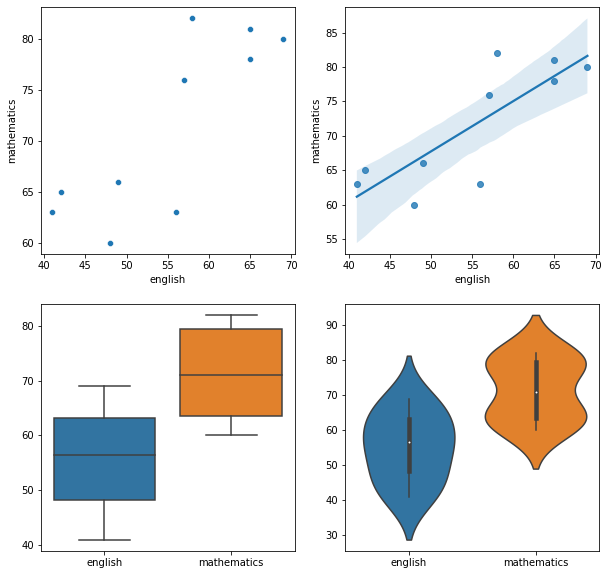

In [24]:
import seaborn as sns
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(ax=axes[0,0], data=scores_df,x='english',y='mathematics')
sns.regplot(ax=axes[0,1], x=scores_df.english,y=scores_df.mathematics)
sns.boxplot(ax=axes[1,0],data=scores_df)
sns.violinplot(ax=axes[1,1],data=scores_df)
plt.show()

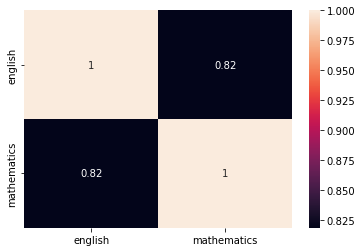

In [25]:
# A.
sns.heatmap(scores_df[['english','mathematics']].corr(),annot=True)

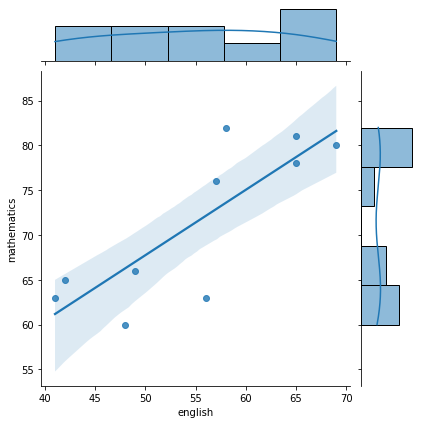

In [8]:
sns.jointplot(data=scores_df,x='english',y='mathematics',kind='reg')

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [27]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]
len(scores)

400

Text(0, 0.5, 'relative frequency')

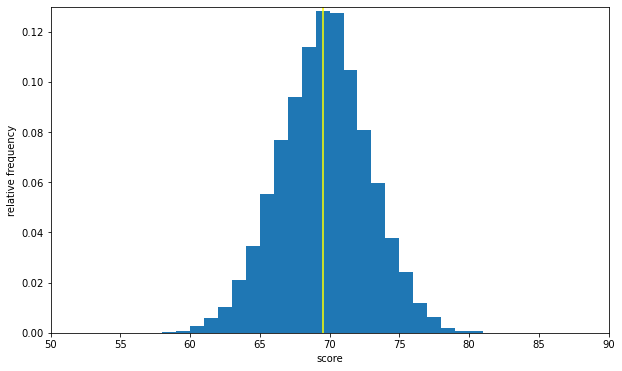

In [10]:
# A.
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

plt.figure(figsize=(10, 6))

plt.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores), 0, 1, 'yellow')
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [82]:
# A
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f
X = Bern(0.5)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 0.5
분산: 0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [83]:
# A.
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f
X=Bin(10,0.5)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 5.0
분산: 2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [80]:
# A.
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f
X = Poi(2)
print(f'기댓값: {E(X):.2}')
print(f'분산: {(V(X)):.2}')

기댓값: 2.0
분산: 2.0


Q9. 평균이 10, 표준편차가 3인 정규분포에서 다음 사항을 수행하세요.
- 확률밀도함수를 그래프로 표현하고 x값이 10일때의 확률을 구하세요.
- 확률이 0.1인 x값을 구하세요.

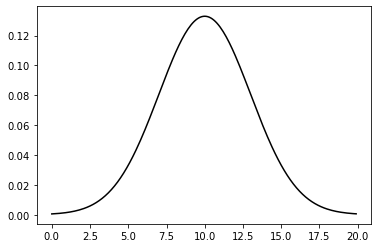

In [34]:
# A.
import matplotlib.pyplot as plt
from scipy import stats, integrate
x_plot = np.arange(0,20,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=10,scale=3), color='black')

In [35]:
stats.norm.pdf(x=10,loc=10,scale=3)

0.1329807601338109

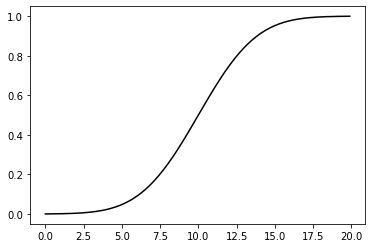

In [37]:
plt.plot(x_plot, stats.norm.cdf(x=x_plot,loc=10,scale=3), color='black')

In [36]:
stats.norm.ppf(0.1,loc=10,scale=3)

6.1553453033661985

Q10. 평균이 1, 표준편차가 2인 정규분포에서 다음을 수행하세요.
- 누적분포함수를 그래프로 표현하고 x분위가 8일때의 누적확률을 구하세요. 
- 누적 확률이 0.5일때의 x분위를 구하세요.

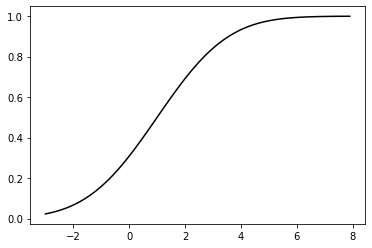

In [15]:
# A.
import matplotlib.pyplot as plt
x_plot = np.arange(-3,8,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot,loc=1,scale=2), color='black')

In [16]:
stats.norm.cdf(x=8,loc=1,scale=2)

0.9997673709209645

In [17]:
stats.norm.ppf(0.5,loc=1,scale=2)

1.0

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [38]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./dataset/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [39]:
# A. df2의 species의 A, B를 C,D로 변경
df1 = pd.read_csv("./dataset/5_2_fm.csv")
df2 = df1.copy()
df2.species = list('CCCDDD')
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [40]:
# A. df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
import pandas as pd
import numpy as np

def change(a, b):
    if a == 'C':
        return b*2
    else:
        return b*3    

df2['len'] = df2.apply(lambda x:change(x['species'],x['length']),axis=1)
df2.length = df2.len
df2.drop('len',axis=1,inplace=True)
df2
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


In [94]:
# A. df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출
df.groupby('species').describe()

length                                         
         count  mean  std   min   25%   50%   75%   max
species                                                
A          3.0   3.0  1.0   2.0   2.5   3.0   3.5   4.0
B          3.0   8.0  2.0   6.0   7.0   8.0   9.0  10.0
C          3.0   6.0  2.0   4.0   5.0   6.0   7.0   8.0
D          3.0  24.0  6.0  18.0  21.0  24.0  27.0  30.0

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [43]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [44]:
# A. 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요.
df = pd.concat([shoes,shoes1],ignore_index=True)
df    

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


In [45]:
# A. 피봇을 이용해서 교차분석표를 만드세요
cross = pd.pivot_table(data = df, values='sales',aggfunc='sum', index= 'store', columns = 'color')
cross

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [46]:
# A. 독립성 검정
# p값이 0.05보다 크므로 "매장에 따라 신발색이 다르다"는 가설은 유의미하지 않다
import scipy as sp
from scipy import stats
sp.stats.chi2_contingency(cross, correction=False)

(3.413537549407115,
 0.06466368573255789,
 1,
 array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [47]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
titanic.sex.isnull().sum()

0

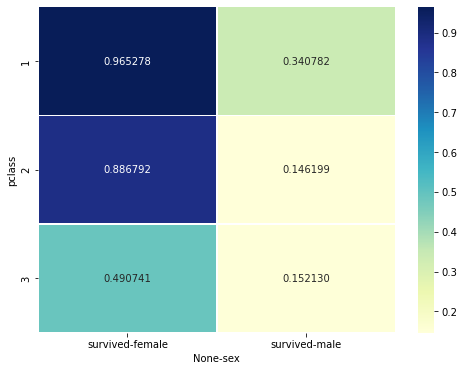

In [49]:
# A.
import seaborn as sns
table = titanic.pivot_table(index=['pclass'],columns=['sex'],values=['survived'],\
                        aggfunc='mean')
table
plt.figure(figsize=(8,6))
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [52]:
# A.
# 평균 4, 표준편차 0.8인 정규분포에서 10개 샘플 추출
from scipy import stats
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

sample_mean_array = np.zeros(10000)

for i in range(10000):
    sample_mean_array[i] = population.rvs(size = 10).mean().round(2)
sample_mean_array[:10]

array([4.22, 4.3 , 4.02, 3.84, 4.33, 4.21, 3.71, 4.14, 3.79, 4.33])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

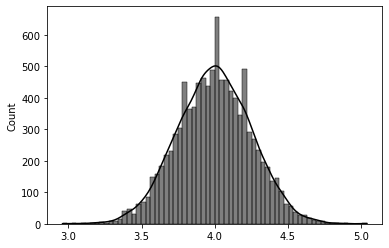

In [53]:
# A.
import seaborn as sns
sns.histplot(sample_mean_array,color='black',kde=True)

Q16. 크기가 10인 표본 데이터 [1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4]로 다음을 수행하세요.
- 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [54]:
# A
import numpy as np
from scipy.stats import norm

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.30 ~ 1.68


Q17. 어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 제품의 평균 길이를 추정하기 위하여 표본을 아래와 같이 추출하였다. 각각의 경우에 적합한 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 95% 신뢰수준에서의 신뢰구간
- 99% 신뢰수준에서의 신뢰구간

In [55]:
# A
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [56]:
# A.
# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.99

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.63 ~ 50.65


Q18. 모집단의 표존편차는 0.5로 알려져 있다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [57]:
# A.
# 모집단의 표준편차를 알고 있는 경우
import numpy as np
from scipy.stats import norm, t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std = 0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포)에 해당하는 z-score(표준편차 단위의 값)를 계산
z_val = norm.ppf((1 + conf_level) / 2) 

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


Q19. 모집단의 표존편차는 알려져 있지 않다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [58]:
# A.
# 모집단의 표준편차를 모르는 경우
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# t값 계산
# t-분포에서 어떤 확률값(누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


Q20. 자유도가 10이고 유의 수준이 0.05인 경우의 t-value를 구하세요.

In [59]:
# A.
from scipy.stats import t

df = 10  # 자유도
alpha = 0.05  # 유의 수준
t_value = t.ppf(1 - alpha/2, df)

print(t_value)

2.2281388519649385


Q21. t 분포를 구성하여 자유도가 커짐에 따라 표준정규에 근사하는 현상을 그래프로 시각화하세요. 

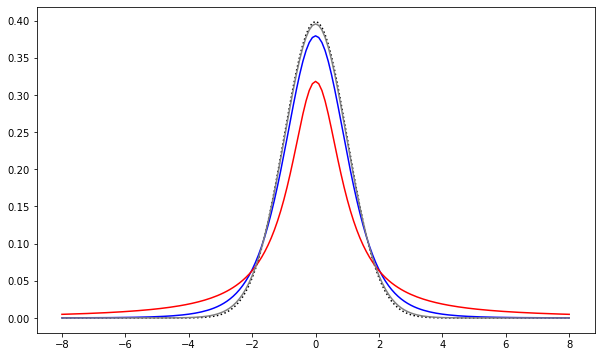

In [61]:
# A.
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴

x = np.arange(-8,8.1,0.1)
plt.figure(figsize=(10,6))
plt.plot(x,stats.norm.pdf(x=x),
        color='black',linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=1),
        color='red')
plt.plot(x,stats.t.pdf(x=x,df=5),
        color='blue')
plt.plot(x,stats.t.pdf(x=x,df=30),
        color='gray')
plt.show()

Q22. "평균이 10, 표준편차가 0.8인 정규분포에서 추출한 샘플 사이즈가 커지면 불편분산은 모분산(0.64)에 가까워 진다"는 것을 그래프로 설명하세요.

In [43]:
# A.
ar = stats.norm(10,0.8).rvs(10000000)
print(ar.mean())
print(ar.var())

9.999831689319722
0.64029749544044


[    4     8    12 ...  9992  9996 10000]


Text(10100, 0.62, '0.64')

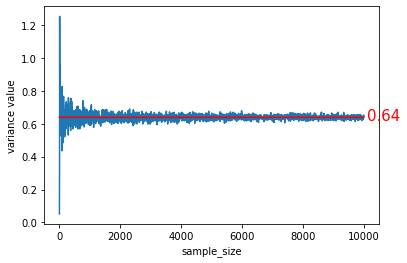

In [63]:
# A.
sample_size = np.arange(4,10004,4)
sample_size
print(sample_size)
sample_var = np.zeros(len(sample_size))

for i in range(len(sample_size)):
    sample = stats.norm(10,0.8).rvs(size=sample_size[i])
    var = np.var(sample,ddof=1)
    sample_var[i] = var

tolist = [0.64 for x in range(2500)]
# print(tolist)
plt.plot(sample_size,sample_var)
plt.plot(sample_size,tolist,color='red')
plt.xlabel('sample_size',fontsize=10)
plt.ylabel('variance value',fontsize=10)
plt.annotate(f'{0.64}',xy=(10100,0.62),color='red',fontsize=15)

Q23. 평균 4, 표준편차 0.8이 정규분포에서 확률이 0.5일때의 분위수 값을 계산하세요.

In [1]:
# A.
from scipy.stats import norm
x = norm.ppf(0.5,loc=4,scale=0.8)
print(x)

4.0


Q24. 모집단의 평균과 표준편차가 각각 100, 10으로 알려져 있다. 표본의 크기각 100이고 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요

In [64]:
# 표본 데이터를 생성합니다.
import numpy as np
mu = 100
sigma = 10
sample_size = 100
np.random.seed(1)
sample = np.random.normal(mu, sigma, sample_size)
sample[:10]

array([116.24345364,  93.88243586,  94.71828248,  89.27031378,
       108.65407629,  76.98461303, 117.44811764,  92.38793099,
       103.19039096,  97.50629625])

In [65]:
# A.
# 임계값: (-1.959963984540054, 1.959963984540054) 범위내 z score가 있으므로 귀무가설을 기각할 수 없음
# p값이 0.05 보다 크므로 귀무가설을 기각할 수 없음
# 표본 평균과 표준편차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량과 유의확률을 계산합니다.
z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
p_value = 1 - norm.cdf(z)

print('검정통계량:', z)
print('유의확률:', p_value)


alpha = 0.05
critical_value = norm.ppf(1-alpha/2) # 상측 임계값
# critical_value = norm.ppf(alpha/2) # 하측 임계값
lower_bound = -critical_value
upper_bound = critical_value

print(f"임계값: ({lower_bound}, {upper_bound})")

검정통계량: 0.6058285207569867
유의확률: 0.27231431430513964
임계값: (-1.959963984540054, 1.959963984540054)


Q25. 모집단의 표준편차를 알지 못하는 상황하에서 표본의 크기각 20인 다음의 경우에 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요


In [66]:
import numpy as np
from scipy.stats import t

# 모집단의 평균을 지정합니다.
mu = 100

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, 10, sample_size)
sample[:10]

array([ 95.52871435, 112.24507705, 104.03491642, 105.93578523,
        89.05088154, 101.69382433, 107.40556451,  90.46299398,
        97.33781494, 100.32614547])

In [67]:
# A.
# 임계값: (-2.093 2.093) 범위내 t-score가 있으므로 귀무가설을 기각할 수 없음
# p값이 0.05 보다 크므로 귀무가설을 기각할 수 없음

import numpy as np
from scipy.stats import t

# 표본 평균과 표준편차를 계산합니다
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량과 유의확률을 계산합니다.
t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - t.cdf(abs(t_score), df=sample_size-1))

alpha = 0.05  # 유의수준
df = 19  # 자유도
t_crit1 = t.ppf(alpha/2, df)  # 하측 임계값
t_crit2 = t.ppf(1-alpha/2, df) # 상측 임계값

print('검정통계량:', round(t_score,4))
print('유의확률:', round(p_value,4))
print('임계값:', round(t_crit1,4),round(t_crit2,4))

검정통계량: -0.4549
유의확률: 0.6543
임계값: -2.093 2.093


Q26. 아래 주어진 데이터셋에서 약을 복용하기 전과 복용 후의 체온에 변화가 있는지에 대한 유의성 검정을 수행하세요.

In [68]:
import pandas as pd
pt_data = pd.read_csv('dataset/5_9_ptt.csv')
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [69]:
# A.
# 귀무가설을 기각하므로 통계적으로 유의미한 차이가 있다고 주장할 수 있다.
before = pt_data[pt_data.medicine=='before']['body_temperature']
after = pt_data.query('medicine=="after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before

# 평균값이 0과 다른지 검정
from scipy import stats
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

Q27.남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [70]:
# A.
import numpy as np
from scipy.stats import ttest_ind

# 남자의 키 데이터
male_height = np.array([172, 174, 176, 178, 180, 182, 184, 186, 188, 190])

# 여자의 키 데이터
female_height = np.array([156, 158, 160, 162, 164, 166, 168, 170, 172, 174])

# 독립표본 t-검정을 수행합니다.
t_statistic, p_value = ttest_ind(male_height, female_height)

# 유의수준을 0.05로 설정하고, 양측 검정을 수행한다고 가정합니다.
alpha = 0.05

# 검정 결과를 출력합니다.
if p_value < alpha:
    print("검정 결과 : 남자와 여자의 키의 평균 차이가 있다고 할 수 있습니다.")
else:
    print("검정 결과 : 남자와 여자의 키의 평균 차이가 없다고 할 수 있습니다.")

검정 결과 : 남자와 여자의 키의 평균 차이가 있다고 할 수 있습니다.


Q28. 아래 데이터셋에서 color별 click빈도가 다른지에 대한 독립성 검정을 수행하세요.

In [71]:
click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [72]:
# A.
# p값이 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단
# 분할표
cross = pd.pivot_table(data=click_data,values='freq',
                      aggfunc='sum',index='color',columns='click')
# 카이스퀘어 통계량, p값, 자유도, 기대도수표
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
stats.chi2_contingency(cross,correction=False) # 보정 안함

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

Q29."아래 표본의 평균은 10과 같다"라는 귀무가설에 대하여 "표본 평균은 10이 아니다"라는 대립가설이 유의미한지 검정을 수행하세요.

sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

In [73]:
# A.
# 귀무가설: 표본 평균은 10과 같다
# 대립가설: 표본 평균은 10이 아니다

import numpy as np
from scipy.stats import t

# 샘플 데이터 생성
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

mu = 10  # 귀무가설에 따른 평균값
alpha = 0.05  # 유의 수준
sample_mean = np.mean(sample_data)  # 표본평균
sample_std = np.std(sample_data, ddof=1)  # 표본표준편차
df = len(sample_data) - 1  # 자유도
t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data)))  # 검정통계량
t_crit1 = t.ppf(alpha/2, df) # 임계값
t_crit2 = t.ppf(1-alpha/2, df) 
p_value = t.sf(abs(t_value), df) * 2  # p-value

# 결과 출력
print('표본평균:', sample_mean)
print('표본표준편차:', sample_std)
print('t-값:', t_value)
print('임계값:', t_crit1, t_crit2)
print('p-value:', p_value)

if abs(t_value) > t_crit2:
    print('유의수준 {}에서 검정통계량은 임계값보다 크므로 귀무가설 기각'.format(alpha))
else:
    print('유의수준 {}에서 검정통계량은 임계값보다 작으므로 귀무가설 채택'.format(alpha))


표본평균: 10.610000000000001
표본표준편차: 0.5820461990063828
t-값: 3.3141516532462774
임계값: -2.262157162740992 2.2621571627409915
p-value: 0.009024007157468749
유의수준 0.05에서 검정통계량은 임계값보다 크므로 귀무가설 기각


Q30. 아래 df 데이터셋에서 "무게의 평균이 130g보다 작지 않다."라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 

In [74]:
import pandas as pd
df = pd.read_csv('./data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [15]:
len(df)

14

In [75]:
# A.
# 검정통계량이 임계값 보다 작으므로 귀무가설은 기각되고 평균은 130g 보다 작을 수 있다는 것이 유의미하다고 판단
# 검정통계량 z : 표본평균을 표준화
from scipy import stats
import numpy as np

mu = 130
sigma = 3
alpha = 0.05
sample = df.무게
s_mean = np.mean(sample)
z = (s_mean - mu) / (sigma/np.sqrt(14))
print('z값:', z)

# 임곗값
rv = stats.norm()
print('임계값: ',rv.isf(1-alpha))

# 검정통계량으로 부터 p값 산출
# p값이 유의수준 0.05 보다 작으므로 귀무가설 기각
rv.cdf(z)

z값: -1.932298779026813
임계값:  -1.6448536269514722


0.026661319523126635